**Übung Mustererkennung** *WS 2022/23* -- *K. Brandenbusch,  Gernot A. Fink* -- *Technische Universität Dortmund, Lehrstuhl XII, Mustererkennung in eingebetteten Systemen*
___
# Aufgabe 7: Support Vector Machines

Im Gegensatz zu den bisher verwendeten Klassifikatoren, die Klassengebiete explizit über (Mischungen von) Gaussverteilungen modellieren, sollen nun diskriminative Klassifikatoren untersucht werden.<br>
Als besonders leistungsfähig haben sich die in der Vorlesung behandelten Support Vector Machines erwiesen.

Anhand des data2d Datensatzes soll nun die Mustererkennung mittels Support Vector Machines untersucht werden.

---

Zuerst müssen die benötigten Module importiert werden. Für Python stellt die Bibliothek sklearn die [Implementierung einer SVM](http://scikit-learn.org/stable/modules/svm.html#svm) bereit.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

import sys
import matplotlib.pyplot as plt
from sklearn import svm

# Uebergeordneten Ordner zum Pfad hinzufuegen, damit das common Package importiert werden kann
if '..' not in sys.path:
    sys.path.append('..')

from common.classification import ClassificationEvaluator, GaussianClassifier
from common.data_provider import DataProvider
from common import visualization

---
## Lineare SVM

Der zweidimensionale Datensatz data2d enthält 3 Klassen. Laden Sie die zunächst nur die Trainings- und Testdaten der Klasen 0 und 2. Klasse 1 wird hier nicht betrachtet, da sie sich nicht linear von den Klassen 0 und 2 trennen lässt.

Der Methode `DataProvider.get_dataset_and_labels` kann hierzu ein Tupel mit den Indizes der zu ladenden Klassen übergeben werden.

In [2]:
train_data_provider = DataProvider(DataProvider.DATA2DROOT_TRAIN)
test_data_provider = DataProvider(DataProvider.DATA2DROOT_TEST)

train_samples, train_labels = train_data_provider.get_dataset_and_labels(('0','2'))
test_samples, test_labels = test_data_provider.get_dataset_and_labels(('0','2'))

"""
print(train_samples.shape)
print("_-------------")
print(train_labels.shape)
print("_-------------")
print(test_samples.shape)
print("_-------------")
print(test_labels.shape)
print("_-------------")
"""




'\nprint(train_samples.shape)\nprint("_-------------")\nprint(train_labels.shape)\nprint("_-------------")\nprint(test_samples.shape)\nprint("_-------------")\nprint(test_labels.shape)\nprint("_-------------")\n'

Trainieren Sie nun eine lineare SVM (`svm.LinearSVC` von sklearn) zur Trennung der beiden Klassen.
Evaluieren Sie diese auf den Testdaten. Hierzu können Sie ebenfalls den `ClassificationEvaluator` aus dem Modul [`common.classification`](../common/classification.py) verwenden.

Wie hoch ist der Klassifikationsfehler im Vergleich zum Normalverteilungsklassifikator? 

Visualisieren Sie die resultierende Trennfunktion. Im Modul [`common.visualization`](../common/visualization.py) steht dafür die Methode `plot_svm` bereit.<br>
Diskutieren Sie den Einfluss der Slack-Variablen (in Form des C-Parameters) auf die Trennfunktion und damit den entstehenden Klassifikationsfehler.

Fehlerrate: 7.7; Anzahl falsch-klassifizierte Muster: 103; Anzahl Muster: 1332
Klassenspezifische Fehlerraten
Klasse 0:	Fehlerrate: 5.6;	Anzahl falsch-klassifizierte Muster:  37;	Anzahl Muster: 666
Klasse 2:	Fehlerrate: 9.9;	Anzahl falsch-klassifizierte Muster:  66;	Anzahl Muster: 666
_________________________________
Fehlerrate: 7.7; Anzahl falsch-klassifizierte Muster: 103; Anzahl Muster: 1332
Klassenspezifische Fehlerraten
Klasse 0:	Fehlerrate: 6.0;	Anzahl falsch-klassifizierte Muster:  40;	Anzahl Muster: 666
Klasse 2:	Fehlerrate: 9.5;	Anzahl falsch-klassifizierte Muster:  63;	Anzahl Muster: 666


c:\Program Files\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


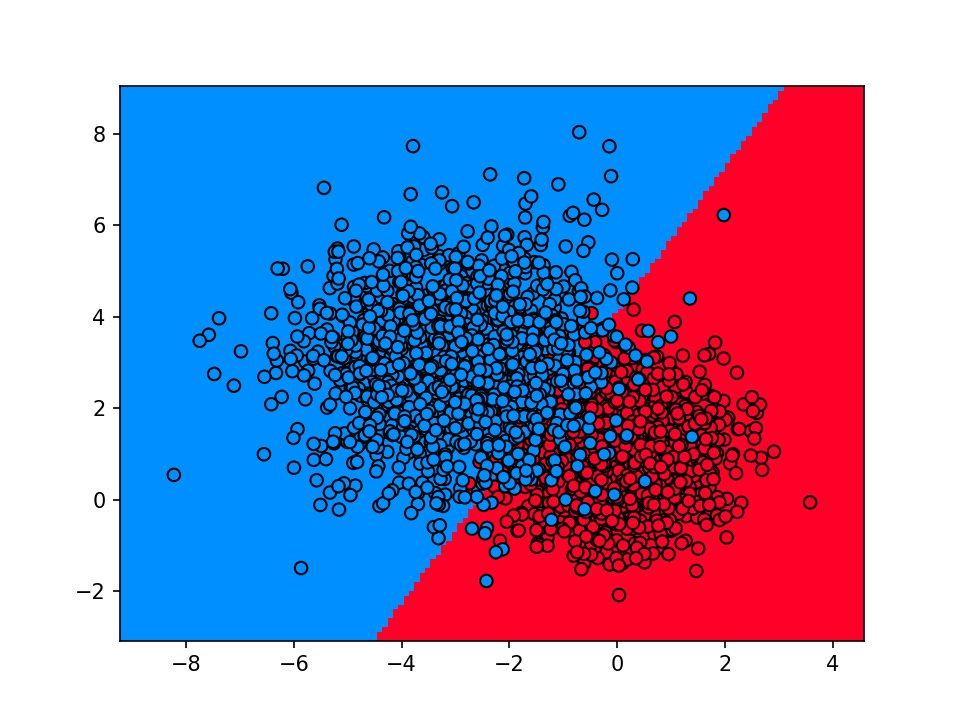

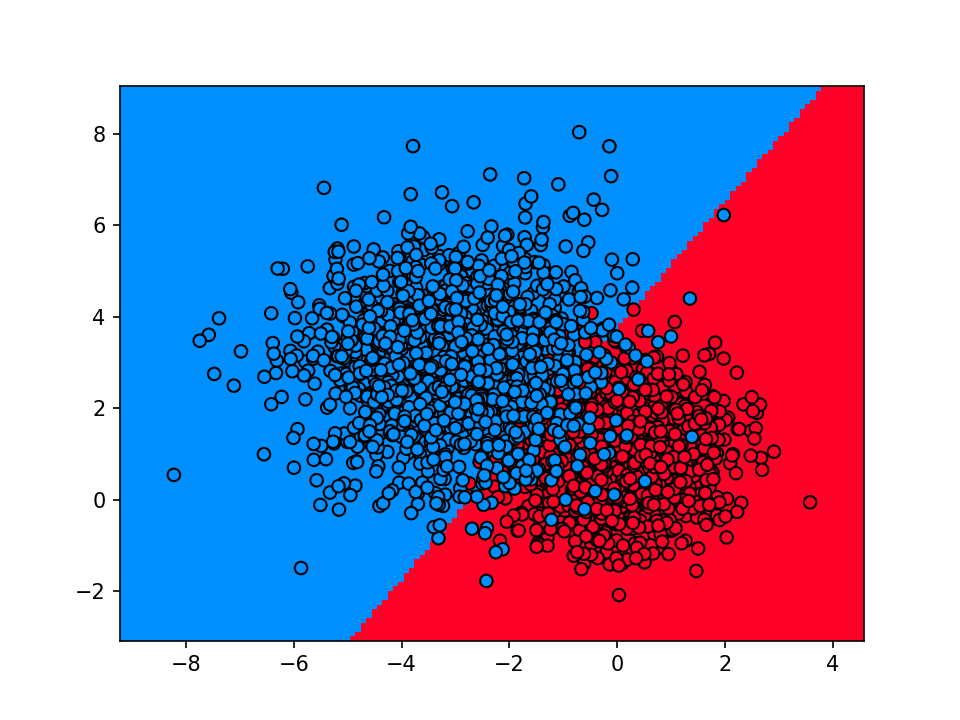

In [3]:
old_svm = svm.LinearSVC(C=1)
old_svm.fit(train_samples,train_labels)
calc_labels_old = old_svm.predict(test_samples)

classiEvali = ClassificationEvaluator(calc_labels_old, test_labels)
classiEvali.print_results()

_, ax = plt.subplots(dpi=150) 
visualization.plot_svm(ax, train_samples, train_labels, old_svm)

print("_________________________________")


new_svm = svm.LinearSVC(C=50000)
new_svm.fit(train_samples,train_labels)
calc_labels_new = new_svm.predict(test_samples)

_, ax2 = plt.subplots(dpi=150) 
visualization.plot_svm(ax2, train_samples, train_labels, new_svm)

classiEvali = ClassificationEvaluator(calc_labels_new, test_labels)
classiEvali.print_results()

---
## Kernel SVM
Laden Sie nun die Beispiele der Klassen 1 und 2. Da die beiden Klassen nicht linear trennbar sind, ist die Verwendung eines Kernels notwendig.<br>
Die Klasse `svm.SVC` unterstützt beispielsweise `linear`, `rbf`, `poly` und `sigmoid`. Beachten Sie, dass auch die Kernel ggf. Hyperparater besitzen, welche eingestellt werden müssen!

Evaluieren Sie, welcher Kernel geeignet ist, um das Problem zu lösen. Visualisieren Sie auch hier die Trennfunktion und diskutieren Sie den Einfluss des Kernels und dessen Parameter.

Fehlerrate: 4.2; Anzahl falsch-klassifizierte Muster:  56; Anzahl Muster: 1332
Klassenspezifische Fehlerraten
Klasse 1:	Fehlerrate: 2.6;	Anzahl falsch-klassifizierte Muster:  17;	Anzahl Muster: 666
Klasse 2:	Fehlerrate: 5.9;	Anzahl falsch-klassifizierte Muster:  39;	Anzahl Muster: 666
_________________________________
Fehlerrate: 8.0; Anzahl falsch-klassifizierte Muster: 106; Anzahl Muster: 1332
Klassenspezifische Fehlerraten
Klasse 1:	Fehlerrate: 5.4;	Anzahl falsch-klassifizierte Muster:  36;	Anzahl Muster: 666
Klasse 2:	Fehlerrate: 10.5;	Anzahl falsch-klassifizierte Muster:  70;	Anzahl Muster: 666


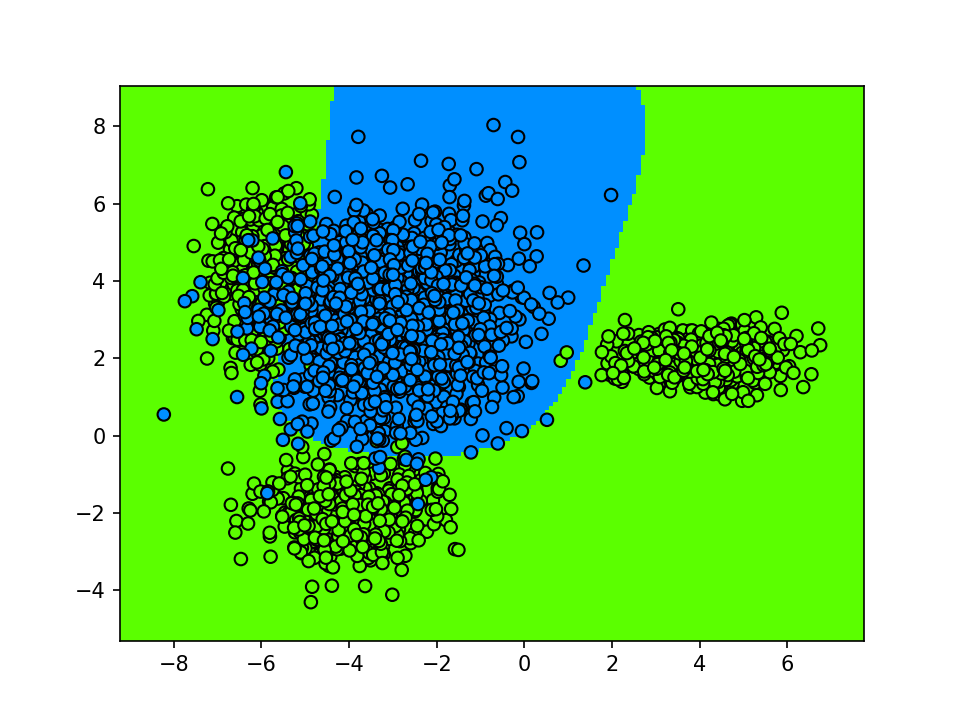

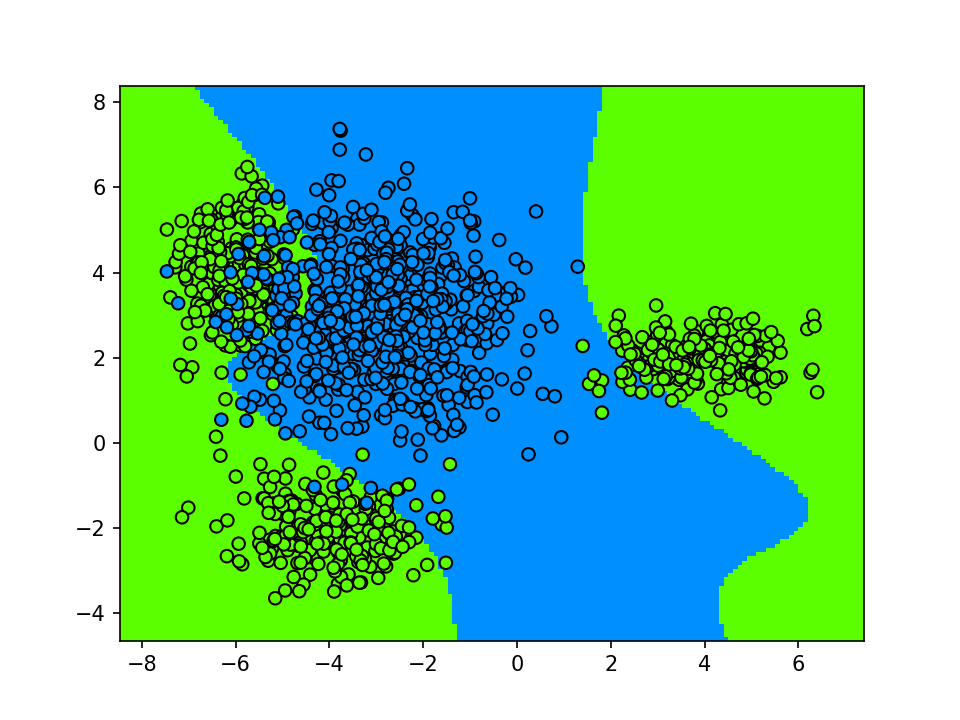

In [5]:
train_data_provider = DataProvider(DataProvider.DATA2DROOT_TRAIN)
test_data_provider = DataProvider(DataProvider.DATA2DROOT_TEST)

train_samples, train_labels = train_data_provider.get_dataset_and_labels(('1','2'))
test_samples, test_labels = test_data_provider.get_dataset_and_labels(('1','2'))

old_svm = svm.SVC(kernel="rbf")
old_svm.fit(train_samples,train_labels)
calc_labels_old = old_svm.predict(test_samples)

classiEvali = ClassificationEvaluator(calc_labels_old, test_labels)
classiEvali.print_results()

_, ax = plt.subplots(dpi=150) 
visualization.plot_svm(ax, train_samples, train_labels, old_svm)

print("_________________________________")


new_svm = svm.SVC(kernel="rbf")
new_svm.fit(train_samples,train_labels)
calc_labels_new = new_svm.predict(test_samples)

_, ax2 = plt.subplots(dpi=150) 
visualization.plot_svm(ax2, test_samples, test_labels, new_svm)

classiEvali = ClassificationEvaluator(calc_labels_new, test_labels)
classiEvali.print_results()

---
## Multi-Class SVM
Trainieren Sie nun eine Multi-Class SVM zur Lösung des 3-Klassenproblems unter Verwendung eines geeigneten Kernels.
    
Wie können die optimalen kernelspezifischen Parameter sinnvoll ermittelt werden?<br>
Hinweis: Starten Sie zunächst mit den Grundeinstellungen der Bibliothek.

Vergleichen Sie Ihre Ergebnisse mit den bisher erzielten Klassifikationsfehlerraten.

In [21]:
train_data_provider = DataProvider(DataProvider.DATA2DROOT_TRAIN)
test_data_provider = DataProvider(DataProvider.DATA2DROOT_TEST)

train_samples, train_labels = train_data_provider.get_dataset_and_labels()
test_samples, test_labels = test_data_provider.get_dataset_and_labels()

"""
#choose the most efficent Kernel
kernelFunctions = ['linear', 'poly', 'rbf', 'sigmoid']
for current_kernel in kernelFunctions:
    print(f"kerneltype: {current_kernel}")
    old_svm = svm.SVC(kernel=current_kernel)
    old_svm.fit(train_samples,train_labels)
    calc_labels_old = old_svm.predict(test_samples)

    classiEvali = ClassificationEvaluator(calc_labels_old, test_labels)
    classiEvali.print_results()
"""

for i in range(1,20,):
    i = i/10
    old_svm = svm.SVC(kernel='rbf', gamma=i)
    old_svm.fit(train_samples,train_labels)
    calc_labels_old = old_svm.predict(test_samples)

    classiEvali = ClassificationEvaluator(calc_labels_old, test_labels)
    error_rate,_,_ = classiEvali.error_rate()
    print(f"Current Gamme: {i} --> Fehlerrate: {error_rate}")

#_, ax = plt.subplots(dpi=150) 
#visualization.plot_svm(ax, train_samples, train_labels, old_svm)

Current Gamme: 0.1 --> Fehlerrate: 9.05905905905906
Current Gamme: 0.2 --> Fehlerrate: 8.708708708708707
Current Gamme: 0.3 --> Fehlerrate: 8.708708708708707
Current Gamme: 0.4 --> Fehlerrate: 8.75875875875876
Current Gamme: 0.5 --> Fehlerrate: 8.65865865865866
Current Gamme: 0.6 --> Fehlerrate: 8.608608608608609
Current Gamme: 0.7 --> Fehlerrate: 8.608608608608609
Current Gamme: 0.8 --> Fehlerrate: 8.508508508508509
Current Gamme: 0.9 --> Fehlerrate: 8.608608608608609
Current Gamme: 1.0 --> Fehlerrate: 8.608608608608609
Current Gamme: 1.1 --> Fehlerrate: 8.558558558558559
Current Gamme: 1.2 --> Fehlerrate: 8.80880880880881
Current Gamme: 1.3 --> Fehlerrate: 8.85885885885886
Current Gamme: 1.4 --> Fehlerrate: 8.80880880880881
Current Gamme: 1.5 --> Fehlerrate: 8.85885885885886
Current Gamme: 1.6 --> Fehlerrate: 8.80880880880881
Current Gamme: 1.7 --> Fehlerrate: 8.75875875875876
Current Gamme: 1.8 --> Fehlerrate: 8.80880880880881
Current Gamme: 1.9 --> Fehlerrate: 8.80880880880881
